<a href="https://colab.research.google.com/github/afiflh/Machine_Learning/blob/main/Kuis%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1: Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

Nama: Afif Lukmanul Hakim

Kelas: TI-3G/02

NIM: 2141720262

In [1]:
# Menginstal beberapa paket Python yang umum digunakan.
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST dataset menggunakan torchvision
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 89327911.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 60567846.91it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25539591.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12314498.23it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Ekstrak data dan label
data_mnist = mnist_dataset.data
label = mnist_dataset.targets

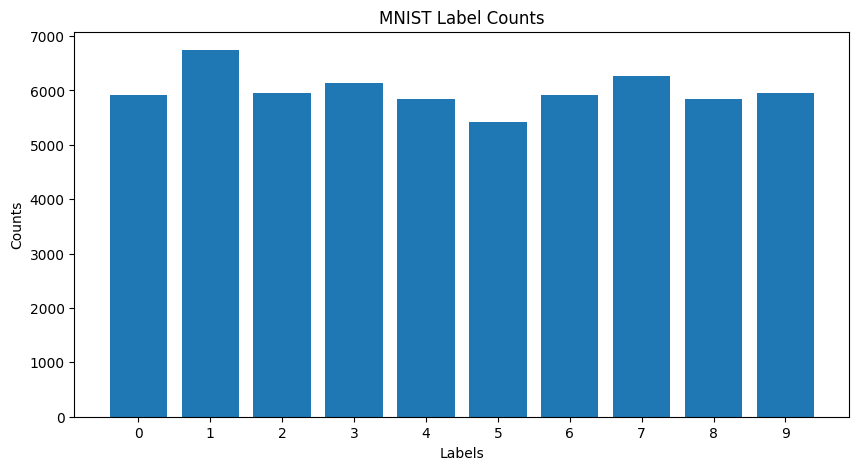

In [5]:
#1 Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan?
labelcounts = torch.bincount(label)

#Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), labelcounts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

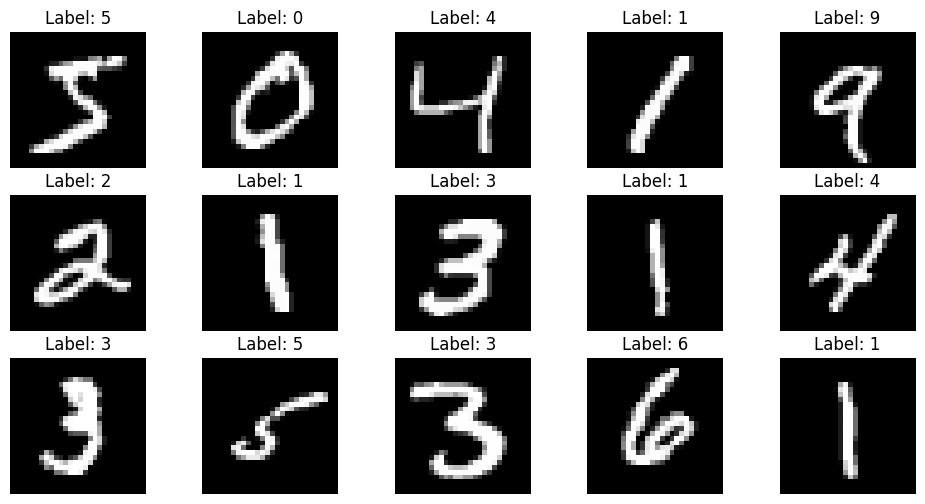

In [9]:
#2 Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.
plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_mnist[i], cmap='gray')
    plt.title(f"Label: {label[i].item()}")
    plt.axis('off')

plt.show()

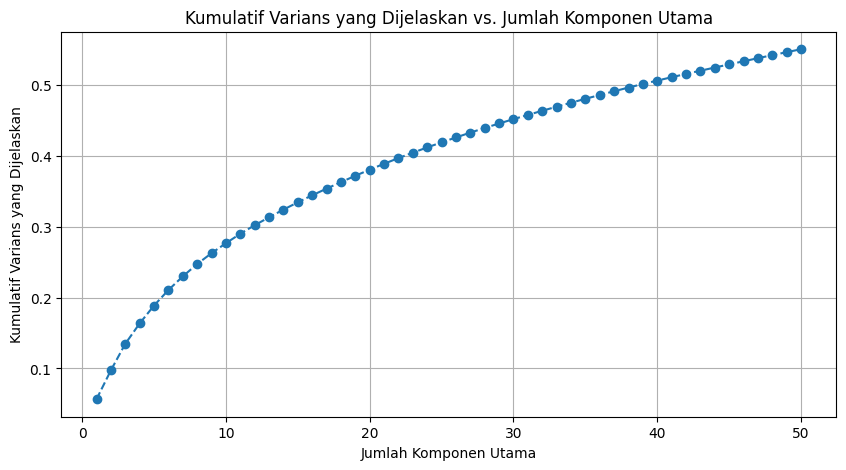

In [13]:
#3 Lakukan proses ekstraksi fitur pada data MNIST

#Menganalisis dan preprocessing data.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Mengubah bentuk (reshape) array data.
data = data_mnist.reshape(data_mnist.shape[0], -1)

#Standarisasi data (rata-rata=0, varians=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

#Melakukan PCA dengan jumlah komponen yang diinginkan
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

#Menampilkan rasio varians yang dijelaskan
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()